<center><strong>Text Mining, NLP, &amp; Social Media Analytics</strong><br />
<strong><font color='blue'>V. Text/Document Clustering</font></strong><br />
(C) Taufik Sutanto - 2018<br />
<img alt="" src="images/SocMed.png" style="height:180px" /> <strong>ITTC Universitas Ahmad Dahlan</strong><br />
25 - 27 Januari 2018<br />
Labkom ITTC Lt. 4 Gedung ITC Kampus 1 UAD Jl. Kapas No. 9, Semaki Yogyakarta</center>


<p><strong>V. Text Clustering:</strong></p>

<ol>
	<li>Pendahuluan Clustering</li>
	<li>Hard Clustering (agglomerative)</li>
	<li>Hierarchical Clustering</li>
	<li>Evaluation: internal vs External</li>
	<li>Cluster Interpretations</li>
	<li><strong>Studi Kasus/Latihan</strong></li>
</ol>


<h3>Clustering?</h3>

<p><img alt="" src="images/5_what_is_clustering.png" style="height:457px; width:864px" /></p>


<p><img alt="" src="images/56_Supervised VS unsupervised.png" style="height:500px; width:1153px" /></p>


<p><img alt="" src="images/5_Clus-Clas.png" style="height:500px; width:766px" /></p>


<p><img alt="" src="images/5_types_of_clustering.png" style="height:500px; width:719px" /></p>


<h3>Metode Clustering yang akan kita bahas:</h3>

<ol>
	<li>k-Means</li>
	<li>k-Means++</li>
	<li>Mini-Batch k-Means</li>
	<li>Mini-Batch k-Means++</li>
	<li>Spectral</li>
	<li>DBSCAN</li>
	<li>Hierarchical Clustering</li>
</ol>


<h2>k-Means</h2>

<p><img alt="" src="images/5_Kmeans_animation.gif" style="height:300px; width:300px" /></p>


<p><img alt="" src="images/5_kmeans_Algorithm.png" style="height:229px; width:430px" /></p>

<ul>
	<li>
	<h3>Apakah pengaruh menggunakan centroid dan algoritma ini terhadap hasil cluster?</h3>
	</li>
	<li>
	<h3>k-Means tidak Robust terhadap outlier, Why? ==&gt; lalu apa yang sebaiknya dilakukan?</h3>
	</li>
</ul>


<h3>k-Means++</h3>

<p>k-means memulai algoritmanya dengan mengacak centroid awal. dan k-means tidak &quot;robust&quot; terhadap centroid awal.</p>

<p>Apa artinya?</p>

<p><strong>k-Means akan menghasilkan hasil yang berbeda-beda jika di-run beberapa kali!....</strong></p>


<p>k-Means++ &quot;mengatasi&quot; hal ini:</p>

<p>inisialisasi centroid tidak random, tapi dengan menghitung probabilitas terbaik bagi centroid awal.</p>

<p>Keuntungan selain robust, biasanya iterasi yang dibutuhkan jauh lebih sedikit ketimbang k-means++</p>

<p>Reference :&nbsp;http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf&nbsp;</p>


<h3>Mini-Batch k-Means:</h3>

<p><img alt="" src="images/5_minibatch.JPG" style="height:350px; width:458px" /></p>

<p>&nbsp;</p>

<p><strong>Referensi</strong>: *Sculley, D. (2010, April). Web-scale k-means clustering. In&nbsp;<em>Proceedings of the 19th international conference on World wide web</em>&nbsp;(pp. 1177-1178). ACM.</p>

<p>* Google</p>


<h3>Spectral Clustering</h3>

<ol>
	<li>Butuh matrix similarity S = S(xi,xj)</li>
	<li>S menjadi Graph tidak berarah</li>
	<li>Karena baris=kolom dan simetris ==&gt; positive definite</li>
	<li>Karena positive definite ==&gt; eigenvalue real</li>
	<li>Eigenvalue dari matrix ini == Spectral Teory :&nbsp;https://en.wikipedia.org/wiki/Spectral_graph_theory&nbsp;</li>
	<li>Maknanya adalah seperti &quot;centrality analysis&quot; di Social media Analytic, yaitu:<br />
	membentuk cluster graph sedemikian sehingga di suatu cluster tertentu weight (konektivitas)-nya paling besar.</li>
</ol>

<p><img alt="" src="images/5_Spectral_graph.png" style="height:134px; width:407px" /></p>

<p>&nbsp;</p>

<p><u><strong>referensi</strong></u>:&nbsp;Ng, A. Y., Jordan, M. I., &amp; Weiss, Y. (2002). On spectral clustering: Analysis and an algorithm. In&nbsp;<em>Advances in neural information processing systems</em>&nbsp;(pp. 849-856).</p>

<h3>&nbsp;</h3>


<p>Karenanya Spectral bisa mengelompokkan data yang tidak &quot;spherical&quot; (bulat seperti k-means)</p>

<p><img alt="" src="images/5_Spectral_kmeans.png" style="height:284px; width:671px" /></p>


<h2>DBSCAN</h2>

<p><img alt="" src="images/5_DBSCAN.gif" style="height:360px; width:690px" /></p>

<p>Karena algoritma (cara kerjanya) ini maka DBSCAN sering digunakan untuk (multivariate) outlier detection.</p>


<h3>hierarchical clustering</h3>

<p><img alt="" src="images/5_hierarchical.gif" style="height:324px; width:720px" /></p>


<p><img alt="" src="images/5_linkages.png" style="height:500px; width:749px" /></p>


<p><img alt="" src="images/5_Hierarchical_Text_Clustering_in_Genes_penyakit.jpg" style="height:200px; width:379px" /></p>


<p><img alt="" src="images/5_clustering_benchmarks.png" style="height:500px; width:962px" /></p>


<p><img alt="" src="images/5_Cluster_yg_mana.png" style="height:400px; width:694px" /></p>


In [1]:
# Aplikasi Text Clustering di Python
path = 'data/'
fileS = [path+'b'+str(i)+'.txt' for i in range(1,6)]
fileS

['data/b1.txt', 'data/b2.txt', 'data/b3.txt', 'data/b4.txt', 'data/b5.txt']

In [2]:
# Load semua dokumen di D lalu preprocess
import TSutanto_lib as ittc 
D = []
for f in fileS:
    doc = ittc.LoadDocuments(file = f)[0]
    doc = ittc.cleanText('. '.join(doc), lemma=True, lang = 'id', stop = True, symbols_remove = True, min_charLen = 2, fix={})
    D.append('. '.join(doc))
print('done!')

done!


In [3]:
# Bentuk VSM-nya
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(D)
print(tfidf.shape)

(5, 30)


In [4]:
# k-means clustering
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
X = StandardScaler(with_mean=False).fit_transform(tfidf) # normalisasi, with_mean=False karena tfidf Sparse bukan Dense
k = 2
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
# Hasil clusteringnya
C1 = km.predict(X)
C1
# Apa beda label ini dengan klasifikasi?

array([1, 0, 0, 1, 0])

In [6]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=1)
kmPP.fit(X)
C2 = kmPP.predict(X)
C2

array([0, 1, 1, 0, 1])

In [7]:
# MiniBatch k-Means http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
#minibatch tidak bisa parallel
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=2, init='random', max_iter=300, tol=0.0001, batch_size=3) 
mbkm.fit(X)
C3 = mbkm.predict(X)
C3

array([0, 1, 0, 0, 1])

In [8]:
# MiniBatch k-Means++
mbkm = cluster.MiniBatchKMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, batch_size=3) 
mbkm.fit(X)
C4 = mbkm.predict(X)
C4

array([0, 1, 1, 0, 1])

In [9]:
# Spectral : http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
import numpy as np

spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="rbf")
spectral.fit(X)
C5 = spectral.labels_.astype(np.int)
C5

array([0, 1, 0, 0, 1])

In [10]:
# DBSCAN http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
# tidak membutuhkan input parameter k!!!... sangat diperlukan untuk text Mining ... atau clustering data yang besar
dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C6 = dbscan.labels_.astype(np.int)
C6
# apa makna cluster label -1?

array([-1, -1, -1, -1, -1])

In [11]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

hierarchical = cluster.AgglomerativeClustering(n_clusters=2, linkage='average')
hierarchical.fit(X.toarray()) # Hierarchical TIDAK BISA menggunakan matriks sparse!!!...
C7 = hierarchical.labels_.astype(np.int)
C7

array([1, 0, 0, 1, 0])

<p><strong>Evaluasi Clustering: Internal VS External</strong></p>

<p><img alt="" src="images/5_Clustering_evaluation.jpg" style="height:400px; width:533px" /></p>


In [12]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means
from sklearn.metrics import silhouette_score as siluet
Sil_Score = siluet(X,C1)
Sil_Score
# Bagaimana cara kerja dan interpretasinya?

0.11114599663865676

In [13]:
# Bagaimana dengan evaluasi External?
from sklearn.metrics.cluster import homogeneity_score as purity

GT = [1,1,0,0,0] # misal ini adalah ground truth/golden standard
purity(GT, C1)

0.020570659450692717

In [14]:
# Evaluasi External NMI 
# teorinya ada disini: https://taufiksutanto.blogspot.co.id/2017/11/evaluasi-eksternal-clustering-pairwise.html
from sklearn.metrics import normalized_mutual_info_score as NMI
NMI(GT,C1)
# untuk F-Score ada juga code dan penjelasannya di blog post di atas

0.020570659450692717

In [15]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means
centroids = km.cluster_centers_
centroids # perhatikan ada 2 centroids, karena ada 2 cluster

array([[0.59266767, 1.6384673 , 1.14878346, 0.59266767, 1.35358965,
        0.        , 1.35687105, 1.11422246, 0.50670245, 0.63767599,
        0.55543689, 1.35358965, 1.46166172, 0.46064233, 0.50670245,
        1.35687105, 1.35687105, 0.50670245, 0.        , 1.36032233,
        0.90533204, 0.76244784, 0.46064233, 1.21331728, 0.        ,
        0.50670245, 1.2920091 , 0.        , 0.        , 1.35687105],
       [1.12865622, 1.39290556, 0.        , 1.12865622, 0.        ,
        1.99035651, 0.        , 0.        , 1.20042101, 1.07863039,
        1.35356146, 0.        , 0.        , 1.22863332, 1.20042101,
        0.        , 0.        , 1.20042101, 1.99035651, 0.        ,
        0.68980019, 0.86580066, 1.22863332, 1.00788774, 1.99546354,
        1.20042101, 0.        , 1.99035651, 1.99035651, 0.        ]])

In [16]:
# misal mau menginterpretasi cluster pertama
# kita akan mencari m nilai terbesar di centroidnya, misal m=5
m = 5
ctr1 = centroids[0]
m_highest = ittc.get_nMax(ctr1,m)
print(m_highest)
idx = [t[1][0] for t in m_highest]

[(1.3568710475171635, (15,)), (1.3568710475171635, (29,)), (1.360322329029181, (19,)), (1.4616617161464116, (12,)), (1.638467297502179, (1,))]


In [17]:
# kemudian kita print terms/kata yang correspond terhadap index vector tersebut
idx_kata = dict(map(reversed, tfidf_vectorizer.vocabulary_.items()))
[idx_kata[i] for i in idx]

['kembang', 'wajib', 'maju', 'indonesia', 'adil']

In [18]:
# Bagaimana dengan plot menggunakan informasi cluster label?
# harus mereduksi terlebih dahulu data kita yang berada di dimensi tinggi, ke dimensi yang lebih rendah
# state-of-the-art untuk hal ini saat ini adalah t-SNE
from sklearn.manifold import TSNE
X2D = TSNE(n_components=2).fit_transform(tfidf.toarray())
# why tfidf and not X ?

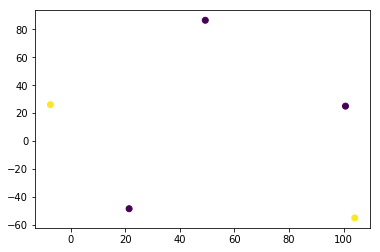

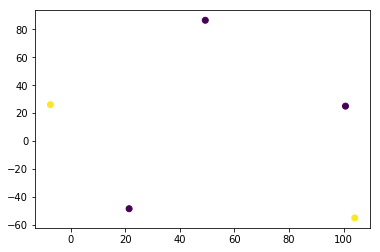

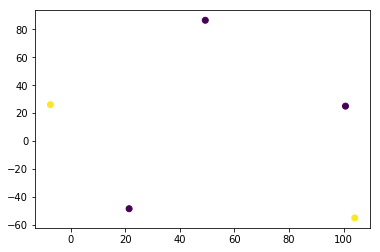

In [21]:
import matplotlib.pyplot as plt
# warna harus integer positif, maka
warna = [k+1 for k in C1]
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=warna)
plt.show()

# Diskusi k optimal di k-means?

<h2>Latihan:</h2>

<ol>
	<li>load semua dokumen txt di folder C:\ITTC\data</li>
	<li>&nbsp;Lakukan preprocessing</li>
	<li>&nbsp;Bentuk vsmnya</li>
	<li>lakukan k-means++ clustering, misal k=3</li>
	<li>Evaluasi secara internal</li>
	<li>Plot hasilnya</li>
	<li>Interpretasi &quot;semua&quot; centroidnya.</li>
</ol>


<p><img alt="" src="images/5_saveme_clustering.jpg" style="height:400px; width:400px" /></p>
